In [80]:
import sys
assert sys.version_info >= (3,7)

In [81]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
path = "drug_consumption.csv"
dt_drug = pd.read_csv(path)

__Descripcion del Dataset: Consumo de Drogas__

La base de datos contiene registros de 1885 encuestados. Para cada encuestado se conocen 12 atributos: mediciones de personalidad que incluyen NEO-FFI-R (neuroticismo, extraversión, apertura a la experiencia, amabilidad y responsabilidad), BIS-11 (impulsividad) e ImpSS (búsqueda de sensaciones), nivel de educación, edad, género, país de residencia y etnia. Todos los atributos de entrada son originalmente categóricos y se cuantifican. Después de la cuantificación, los valores de todas las características de entrada se pueden considerar como valores reales. Además, a los participantes se les preguntó sobre su uso de 18 drogas legales e ilegales (alcohol, anfetaminas, nitrito de amilo, benzodiacepinas, cannabis, chocolate, cocaína, cafeína, crack, éxtasis, heroína, ketamina, drogas legales, LSD, metadona, setas, nicotina y abuso de sustancias volátiles y una droga ficticia (Semeron) que se introdujo para identificar a quienes exageran. Para cada droga, tienen que seleccionar una de las respuestas: nunca usaron la droga, la usaron hace más de una década, o en la última década, año, mes, semana o día. La base de datos contiene 18 problemas de clasificación. Cada una de las variables de etiqueta independiente contiene siete clases: "Nunca Usado", "Usado hace más de una Década", "Usado en la Última Década", "Usado en el Último Año", "Usado en el Último Mes", "Usado en la Última Semana" y "Usado en el Último Día".

# Analisis del conjunto de datos

In [84]:
# Hacemos una visualizacion de los datos numericos
dt_drug[dt_drug.columns[1:14]].head(10)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2
6,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6
7,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5
8,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4
9,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,CL6


In [85]:
# Vemos los valores unicos de las variables categoricas

for column in dt_drug[dt_drug.columns[13:-1]]:
    print(dt_drug[column].value_counts())

Alcohol
CL5    759
CL6    505
CL4    287
CL3    198
CL2     68
CL1     34
CL0     34
Name: count, dtype: int64
Amphet
CL0    976
CL2    243
CL1    230
CL3    198
CL6    102
CL4     75
CL5     61
Name: count, dtype: int64
Amyl
CL0    1305
CL2     237
CL1     210
CL3      92
CL4      24
CL5      14
CL6       3
Name: count, dtype: int64
Benzos
CL0    1000
CL3     236
CL2     234
CL4     120
CL1     116
CL6      95
CL5      84
Name: count, dtype: int64
Caff
CL6    1385
CL5     273
CL4     106
CL3      60
CL0      27
CL2      24
CL1      10
Name: count, dtype: int64
Cannabis
CL6    463
CL0    413
CL2    266
CL3    211
CL1    207
CL5    185
CL4    140
Name: count, dtype: int64
Choc
CL6    807
CL5    683
CL4    296
CL3     54
CL0     32
CL2     10
CL1      3
Name: count, dtype: int64
Coke
CL0    1038
CL2     270
CL3     258
CL1     160
CL4      99
CL5      41
CL6      19
Name: count, dtype: int64
Crack
CL0    1627
CL2     112
CL1      67
CL3      59
CL5       9
CL4       9
CL6       2
Name: c

In [86]:
# Vemos una pequeña descripcion de los datos
dt_drug.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


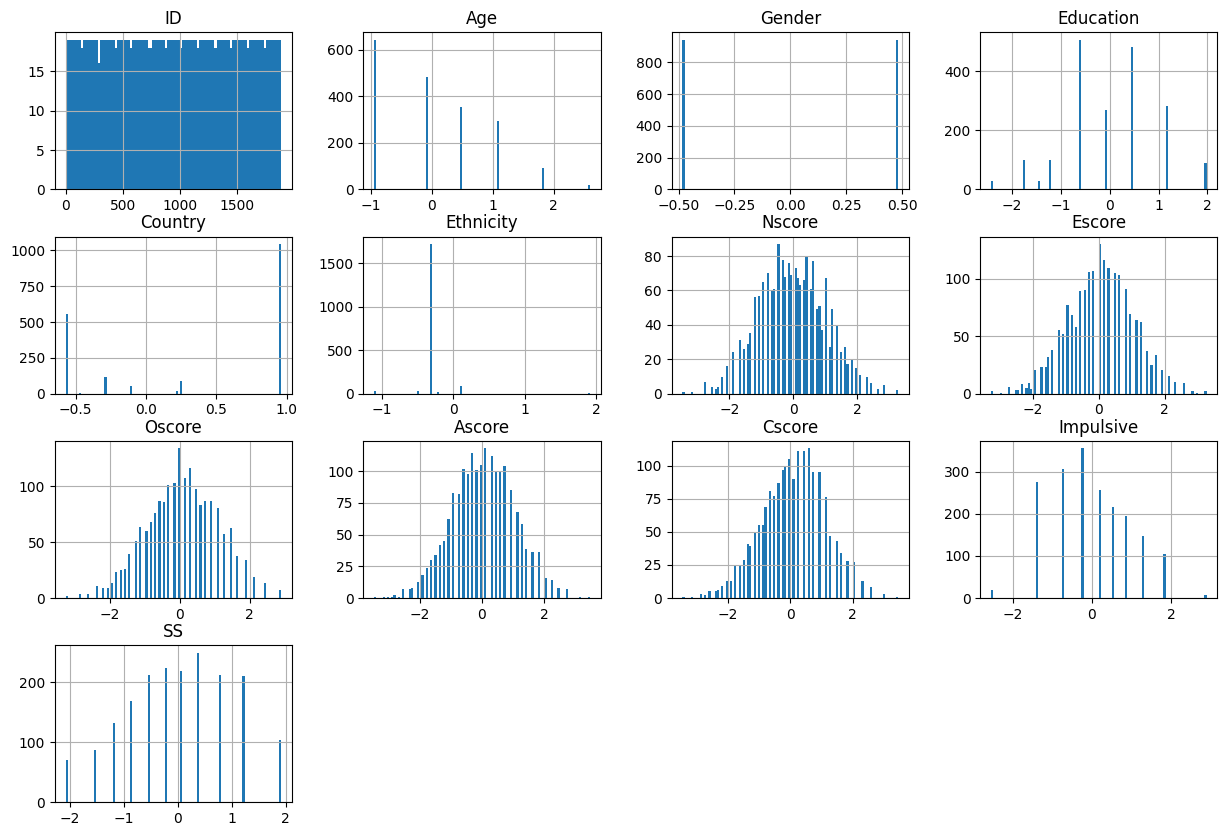

In [87]:
dt_drug.hist(bins=100, figsize=(15,10))
plt.show()

In [88]:
# Calcula la media, mediana y moda para todas las columnas numéricas
media = dt_drug.select_dtypes(include=['float64', 'int64']).mean()
mediana = dt_drug.select_dtypes(include=['float64', 'int64']).median()
# La moda se calcula para todas las columnas porque puede haber columnas categóricas con valores únicos
moda = dt_drug.mode().iloc[0]  # Moda podría tener múltiples valores, tomamos solo el primero
for column in dt_drug[dt_drug.columns[6:13]]:
    print(f"Variable: {column}")
    if pd.api.types.is_numeric_dtype(dt_drug[column]):
        print(f"Media: {media[column]}")
        print(f"Mediana: {mediana[column]}")
        print(f"Min: {dt_drug[column].min()}")
        print(f"Min: {dt_drug[column].max()}\n")


Variable: Nscore
Media: 4.660477453581443e-05
Mediana: 0.04257
Min: -3.46436
Min: 3.27393

Variable: Escore
Media: -0.0001628010610079536
Mediana: 0.00332
Min: -3.27393
Min: 3.27393

Variable: Oscore
Media: -0.0005343978779840694
Mediana: -0.01928
Min: -3.27393
Min: 2.90161

Variable: Ascore
Media: -0.0002449655172413689
Mediana: -0.01729
Min: -3.46436
Min: 3.46436

Variable: Cscore
Media: -0.0003860689655172399
Mediana: -0.00665
Min: -3.46436
Min: 3.46436

Variable: Impulsive
Media: 0.007216063660477443
Mediana: -0.21712
Min: -2.55524
Min: 2.90161

Variable: SS
Media: -0.003291665782493378
Mediana: 0.07987
Min: -2.07848
Min: 1.92173



In [89]:
for column in [dt_drug.columns[13:-1]]:
        print(f"Moda: {moda[column]}")

Moda: Alcohol      CL5
Amphet       CL0
Amyl         CL0
Benzos       CL0
Caff         CL6
Cannabis     CL6
Choc         CL6
Coke         CL0
Crack        CL0
Ecstasy      CL0
Heroin       CL0
Ketamine     CL0
Legalh       CL0
LSD          CL0
Meth         CL0
Mushrooms    CL0
Nicotine     CL6
Semer        CL0
Name: 0, dtype: object


Los resultados obtenidos de la moda revelan que la mayoría de los encuestados han consumido cinco tipos diferentes de drogas, mientras que el resto nunca las ha consumido. Este hallazgo es significativo para la clasificación, ya que indica una tendencia que puede estar relacionada con sus características de personalidad.

## Apreciaciones:
- Dado que falta documentación sobre el proceso de cuantificación aplicado a los datos numéricos, se observa ambigüedad en varias columnas, como en el caso de la edad, que aparenta dividirse en dos categorías sin identificar claramente cuál corresponde a hombres y cuál a mujeres. Un problema similar ocurre con la columna de 'etnicidad'. Sin embargo, en las variables de personalidad, gracias al contexto y a una distribución más uniforme, es posible interpretar las categorías como una escala numérica, en la que un valor bajo indica una puntuación baja y un valor alto, una puntuación alta. Se debe tener en cuenta que la interpretación puede ser erronea ya que existen procesos de encoding que pueden romper una relacion entre el puntaje categorico y el puntaje numerico.

- Es importante considerar que en algunas variables de personalidad, como 'NsCore (Neuroticismo)', un puntaje alto está asociado con emociones negativas, mientras que en otras, como 'Escore (Extraversión)', un puntaje alto refleja emociones positivas. Estas características son cruciales durante el proceso de clasificación, ya que pueden indicar las razones por las cuales una persona podría inclinarse hacia el consumo de una droga específica.

- En relación con las variables que indican la frecuencia de uso de una droga específica, estas están clasificadas desde CL0 hasta CL6, donde CL0 representa el menor uso ("Nunca la usé") y CL6 el mayor uso ("Usado en el último día"). Esta estructuración de los datos facilita una interpretación más clara, permitiendo el uso de un Ordinal Encoder manual que ayuda a observar la correlación con otras variables.

- Dada la distribucion uniforme de los datos no es necesario hacer una normalización

# Limpieza y Tratamiento de datos

In [90]:
# Hacemos una copia del dataset para el tratamiento en caso de que sea necesario
dt_sin_errores_drug = dt_drug.copy()

In [91]:
# Comprobamos que los datos esten completos
dt_sin_errores_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [92]:
# Se revisan las filas duplicadas
duplicate_rows = dt_sin_errores_drug[dt_sin_errores_drug.duplicated()]
dt_sin_errores_drug = dt_sin_errores_drug.drop_duplicates()
duplicate_rows


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA


In [93]:
dt_sin_errores_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [94]:
for columnas in dt_sin_errores_drug.columns:
    print(dt_sin_errores_drug[columnas].unique())

[   1    2    3 ... 1886 1887 1888]
[ 0.49788 -0.07854 -0.95197  2.59171  1.09449  1.82213]
[ 0.48246 -0.48246]
[-0.05921  1.98437  1.16365 -1.22751 -1.7379   0.45468 -0.61113 -2.43591
 -1.43719]
[ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841]
[ 0.126   -0.31685  0.1144  -0.22166 -0.50212 -1.10702  1.90725]
[ 0.31287 -0.67825 -0.46725 -0.14882  0.73545 -1.32828  0.62967 -0.24649
 -1.05308  2.28554 -0.79151 -0.92104 -2.05048 -1.55078  0.52135  1.37297
 -0.34799 -1.1943   0.41667  1.60383 -0.05188  0.04257  1.02119  0.82562
  0.13606  1.13281 -1.43907 -0.58016  0.22393 -2.21844  0.91093 -2.3436
  1.8399   1.49158  3.27393 -1.69163  1.98437  2.82196  1.23461 -1.86962
  2.127   -2.42317  2.46262  1.72012  2.61139 -2.75696 -2.52197 -3.15735
 -3.46436]
[-0.57545  1.93886  0.80523 -0.80615 -1.6334  -0.30033 -1.09207  2.57309
  0.00332  0.16767  1.45421 -1.50796 -1.23177 -0.15487 -1.7625   0.47617
 -0.94779 -3.27393  0.63779 -0.43999  1.74091  0.32197  1.2861   0.96248
  1.114

- Para este conjunto de datos no es necesario hacer imputación de datos ya que estos se encuentran completos y sin datos nulos.

- A pesar de que las columnas de edad, género y educación presentan datos numéricos ambiguos y en algunos casos negativos, es posible inferir su significado de manera similar a las variables de personalidad. Un valor bajo en la columna de edad indica una menor edad, mientras que un valor alto sugiere una edad mayor. Por lo tanto, estas columnas no serán eliminadas y se utilizarán como un recurso final en el proceso de clasificación.

- Por otro lado, las variables de etnicidad y país no muestran ningún patrón consistente ni contribuyen a la explicación del modelo. Por esta razón, se ha decidido eliminar estas variables del análisis.

In [95]:
column_delete = ['Country', 'Ethnicity']

for colum_del in column_delete:
    if colum_del in dt_sin_errores_drug.columns:
        dt_sin_errores_drug = dt_sin_errores_drug.drop(colum_del, axis=1)

dt_sin_errores_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Nscore     1885 non-null   float64
 5   Escore     1885 non-null   float64
 6   Oscore     1885 non-null   float64
 7   Ascore     1885 non-null   float64
 8   Cscore     1885 non-null   float64
 9   Impulsive  1885 non-null   float64
 10  SS         1885 non-null   float64
 11  Alcohol    1885 non-null   object 
 12  Amphet     1885 non-null   object 
 13  Amyl       1885 non-null   object 
 14  Benzos     1885 non-null   object 
 15  Caff       1885 non-null   object 
 16  Cannabis   1885 non-null   object 
 17  Choc       1885 non-null   object 
 18  Coke       1885 non-null   object 
 19  Crack      1885 non-null   object 
 20  Ecstasy 

# Encoder en variables categoricas

In [96]:
dt_encoder_drug = dt_sin_errores_drug.copy()

In [97]:
replace_map = {
    'CL0': 1,
    'CL1': 2,
    'CL2': 3,
    'CL3': 4,
    'CL4': 5,
    'CL5': 6,
    'CL6': 7
}

dt_encoder_drug = dt_encoder_drug.replace(replace_map)

dt_encoder_drug.head()

,ID,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,1,1,1,1,1,1,1,3,1,1
1,2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,5,1,3,1,3,4,1,5,1,1
2,3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,1,1,1,1,1,1,2,1,1,1
3,4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,1,1,3,1,1,1,1,3,1,1
4,5,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,2,1,1,2,1,1,3,3,1,1


Se eligió utilizar la codificación ordinal en lugar de la codificación one-hot para las variables categóricas relacionadas con las drogas debido a la naturaleza de los datos y la estructura del problema. Ademas, la codificacion se realizo de manera manual para controlar el orden natural, lo que puede ser más adecuado. En este caso, las variables categóricas representan diferentes tipos de drogas, y hay cierta jerarquía o relación ordinal entre ellas en términos de cuanto se usa esta droga.

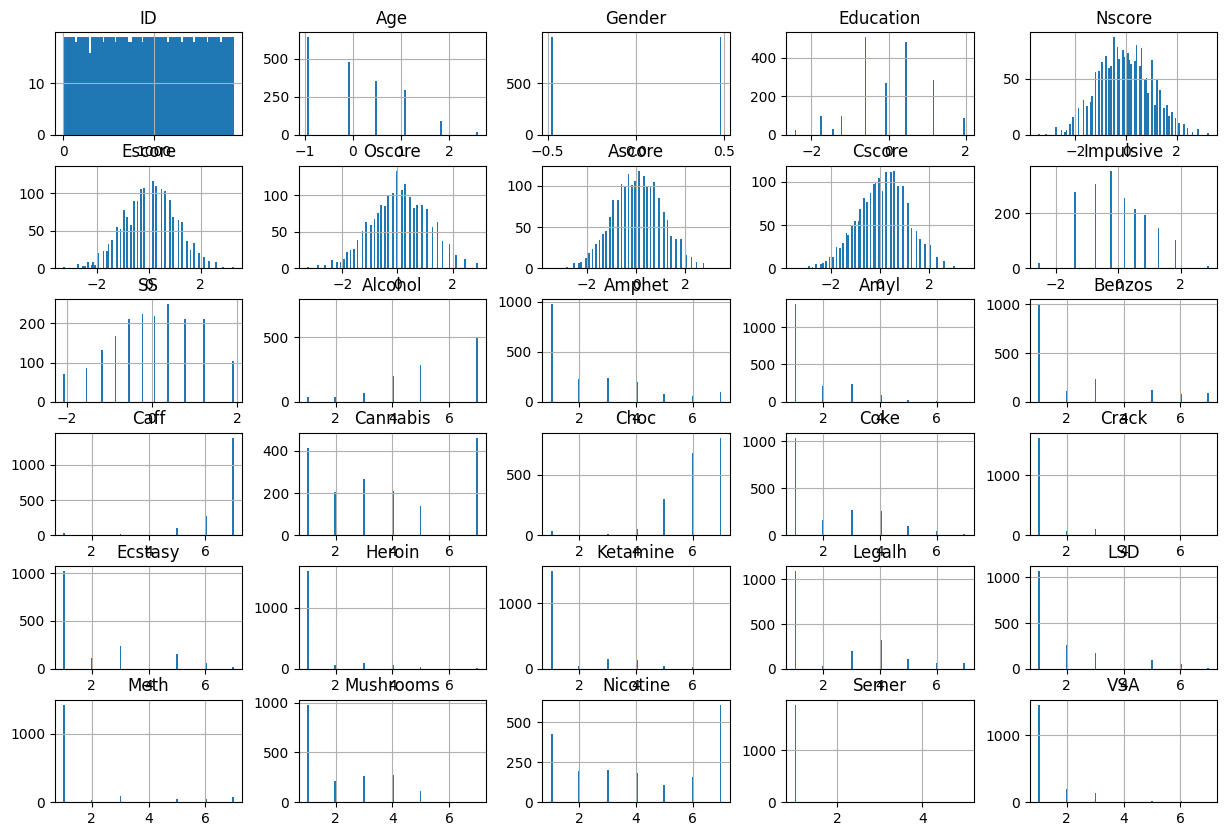

In [98]:
dt_encoder_drug.hist(bins=100, figsize=(15,10))
plt.show()

- Se puede notar que todas las variables estan escaladas y normalizadas correctamente. Por lo que no es necesario un algoritmo para centrar las medias.

# Relacion Entre las Variables

In [99]:
from pandas.plotting import scatter_matrix

## Dataset con encoder

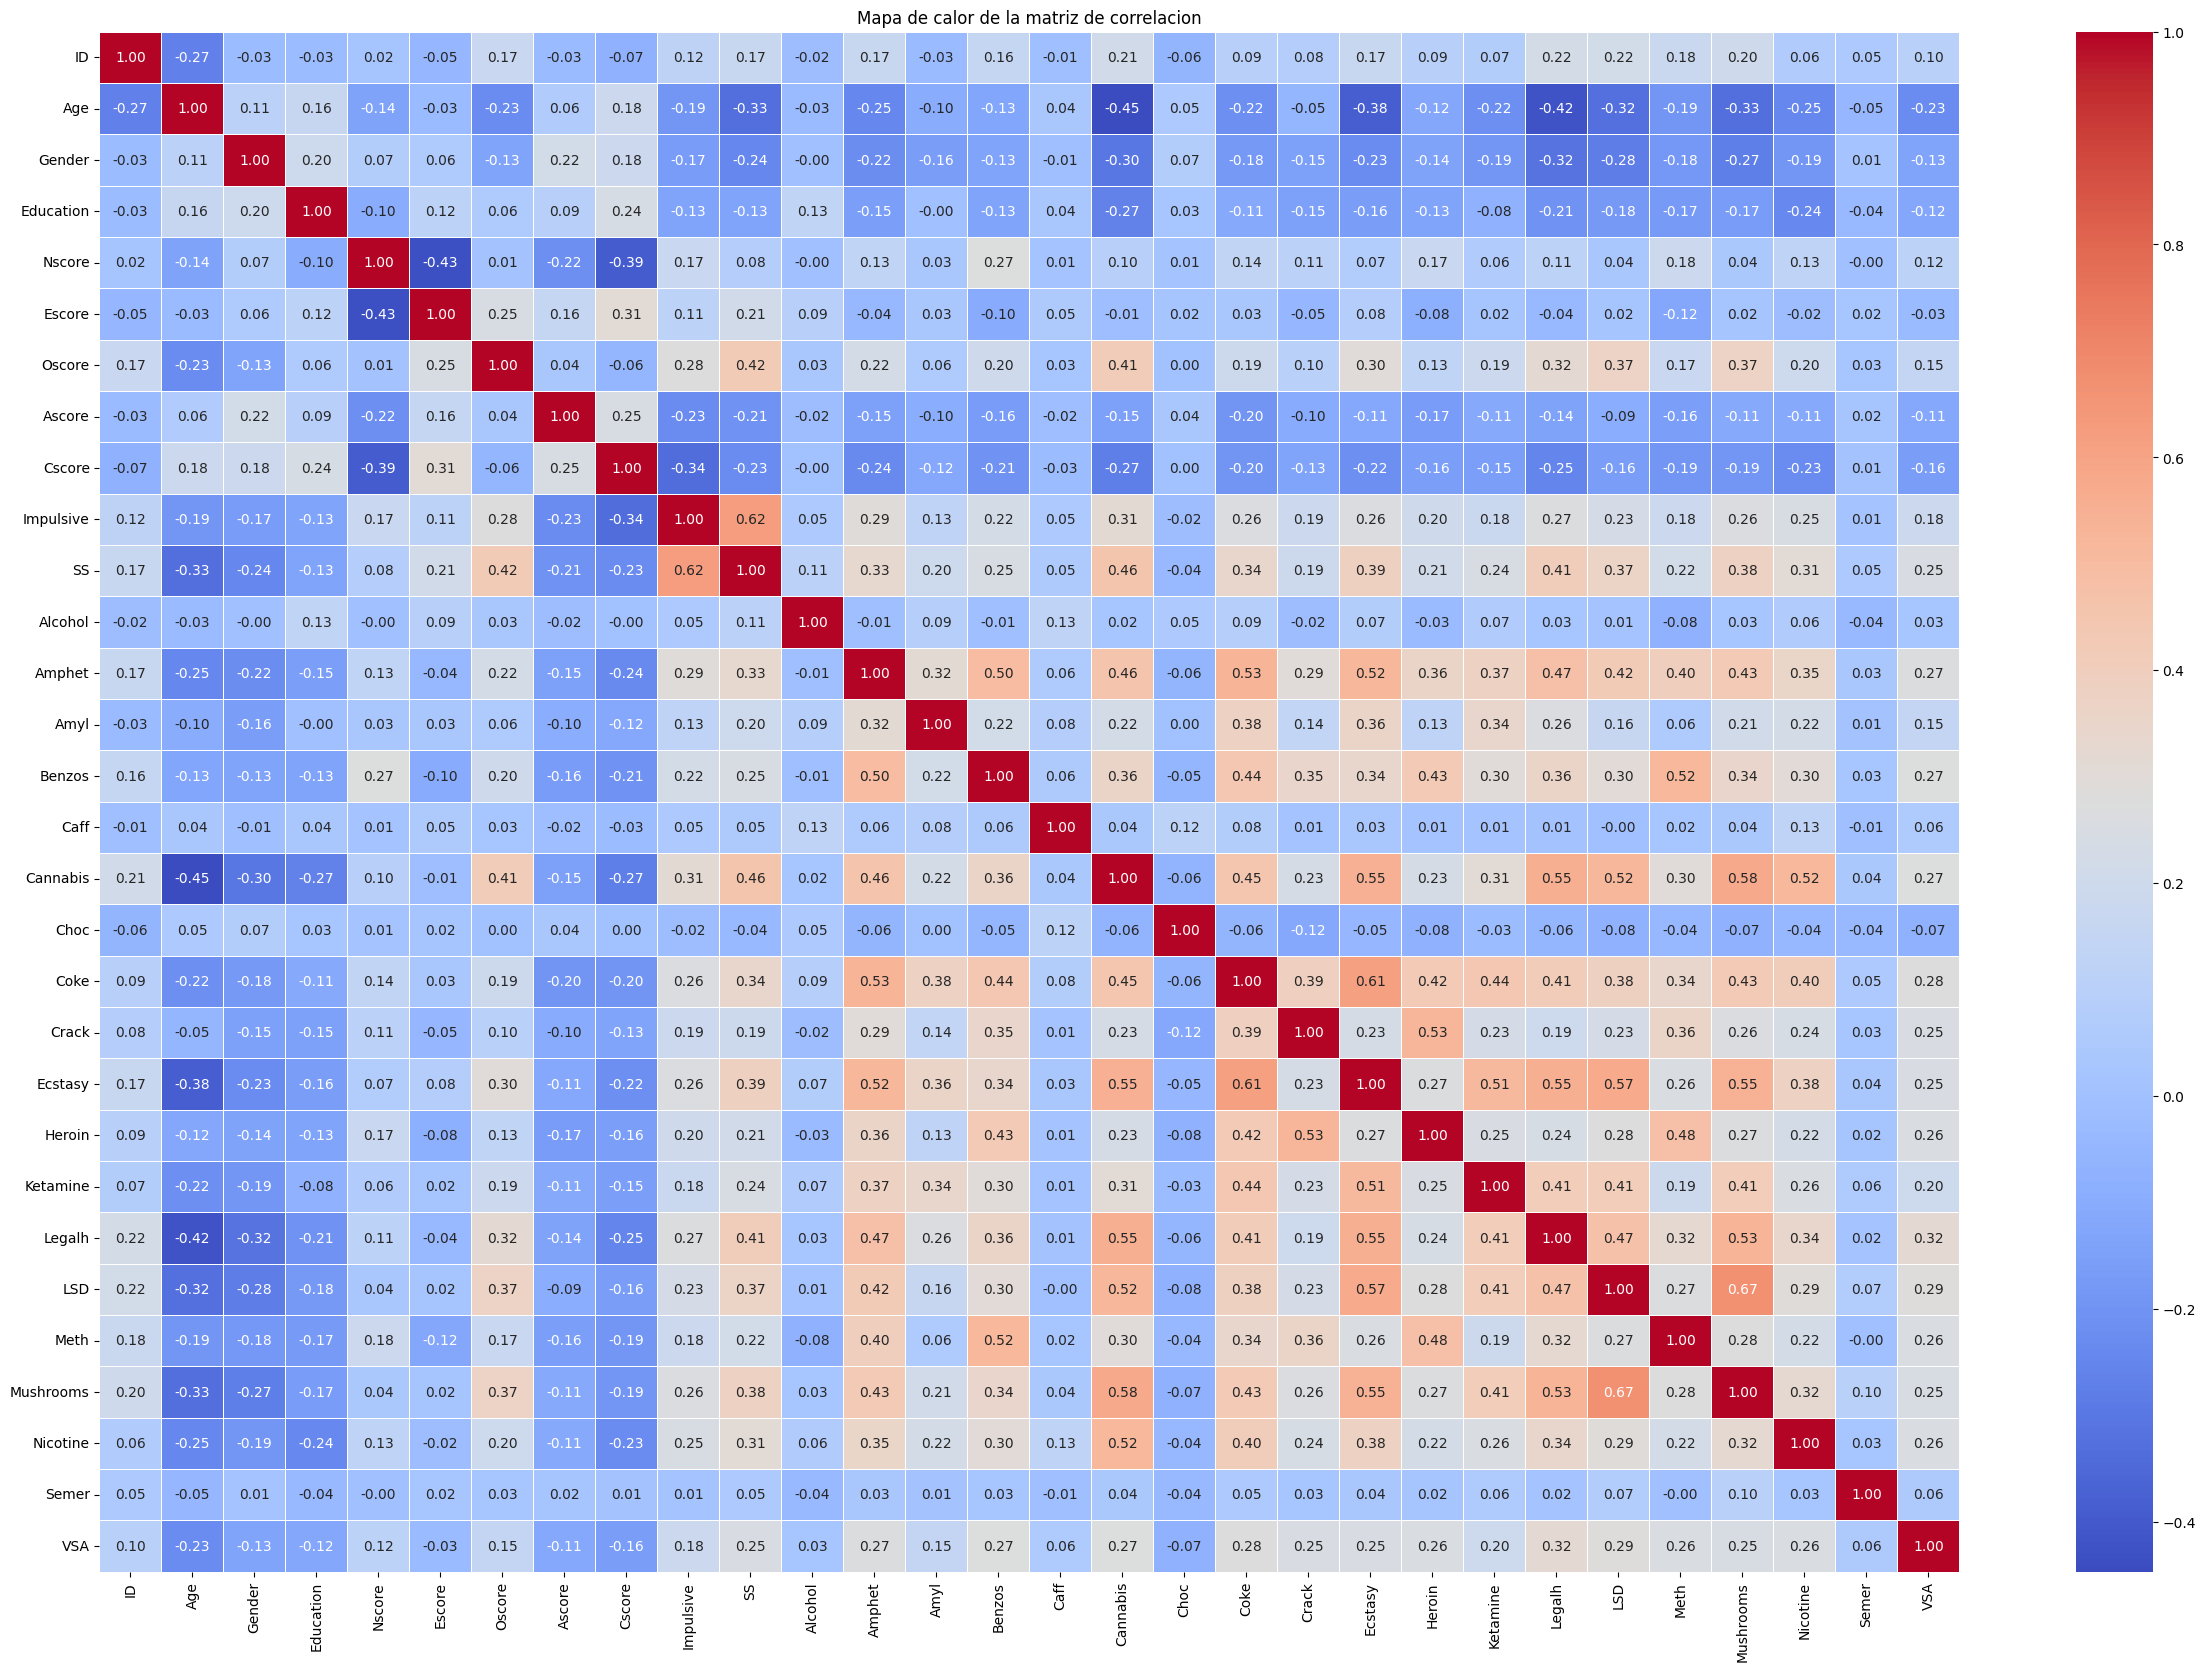

In [100]:

corr_matrix = dt_encoder_drug.corr(numeric_only = True)
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot = True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)
plt.title("Mapa de calor de la matriz de correlacion")
plt.show()

- La característica 'Oscore' y 'SS' muestran la mejor correlación positiva con las variables que se pretenden predecir, lo que indica su posible importancia en el proceso de predicción. Por otro lado, 'Cscore' y 'Age' representan las correlaciones negativas más fuertes dentro del conjunto de datos, destacando su relevancia en la dirección opuesta.

- Es importante considerar que existe una correlación positiva significativa entre las variables a predecir, lo que sugiere que el consumo de una droga específica podría estar asociado con el consumo de otra. Este aspecto es crucial, ya que permite utilizar el comportamiento de una variable predictiva para anticipar el comportamiento de otra en el modelo de predicción. Esta interrelación puede ser clave para desarrollar estrategias de intervención más efectivas y para comprender mejor las dinámicas de consumo de sustancias.


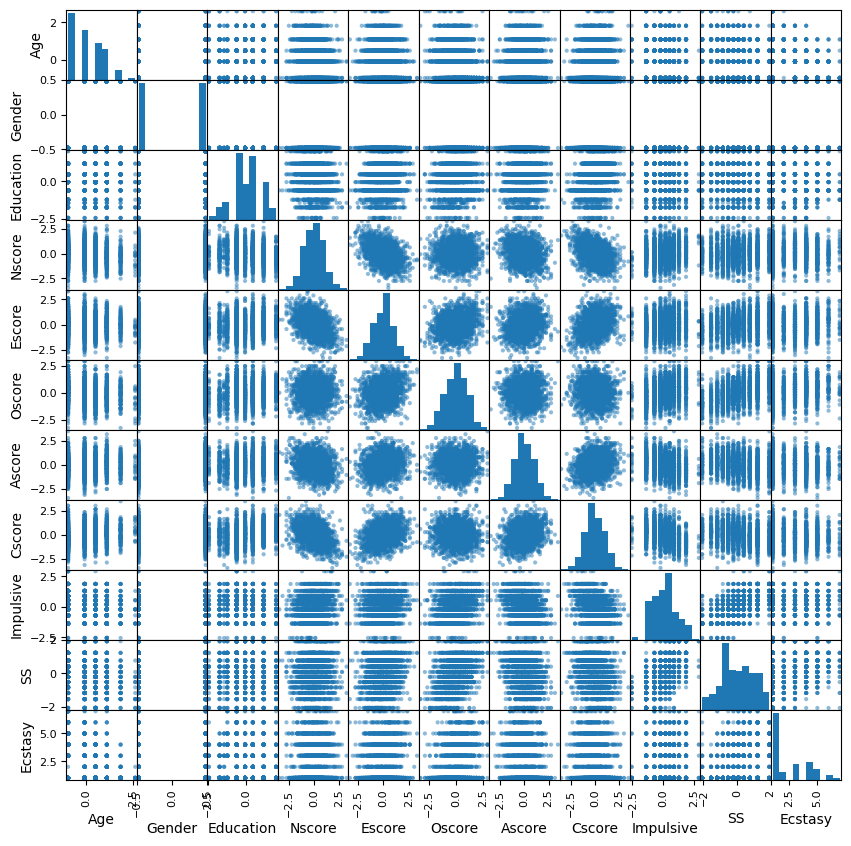

In [101]:
attributes = ["Age","Gender","Education","Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS","Ecstasy"]

scatter_matrix(dt_encoder_drug[attributes], figsize=(10,10))
plt.show()

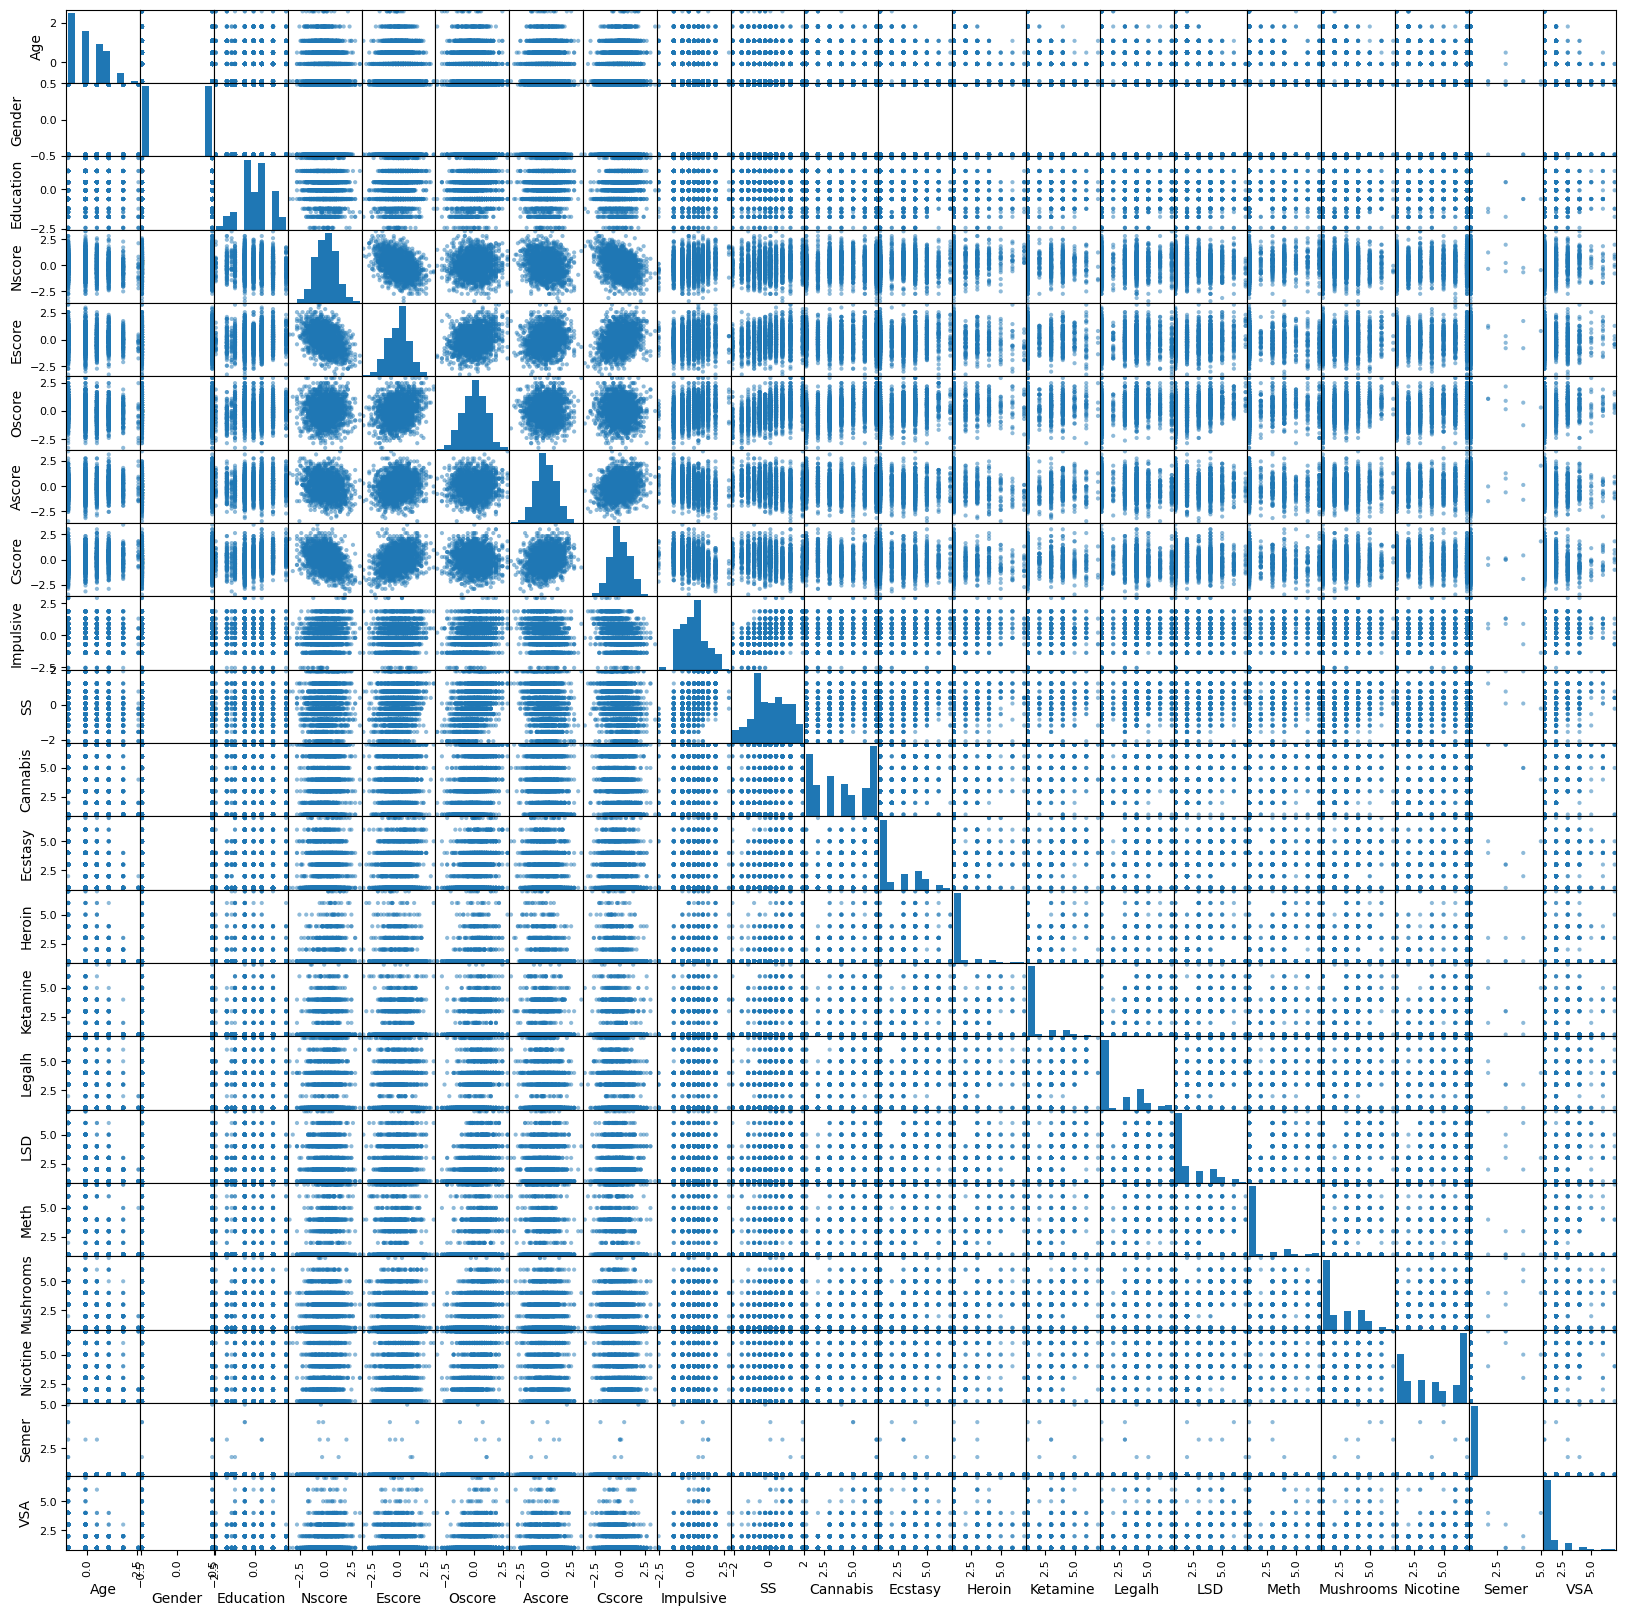

In [102]:
attributes = ["Age","Gender","Education","Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS","Cannabis","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]

scatter_matrix(dt_encoder_drug[attributes], figsize=(20,20))
plt.show()


Las gráficas de dispersión proporcionan evidencia crucial sobre las variables objetivo, destacando sesgos que sugieren la presencia de diferentes categorías para la predicción. Además, los modelos de regresión desarrollados entre las características muestran una fuerte correlación entre las variables. Este enfoque de análisis tanto visual como estadístico es fundamental para detectar patrones y conexiones importantes, los cuales son vitales para incrementar la precisión en las predicciones y para una comprensión más profunda de cómo interactúan las variables analizadas. Este tipo de análisis facilita la toma de decisiones basadas en datos y puede ser crucial en la implementación de estrategias preventivas y en la optimización de intervenciones específicas.

# Escalado de datos:

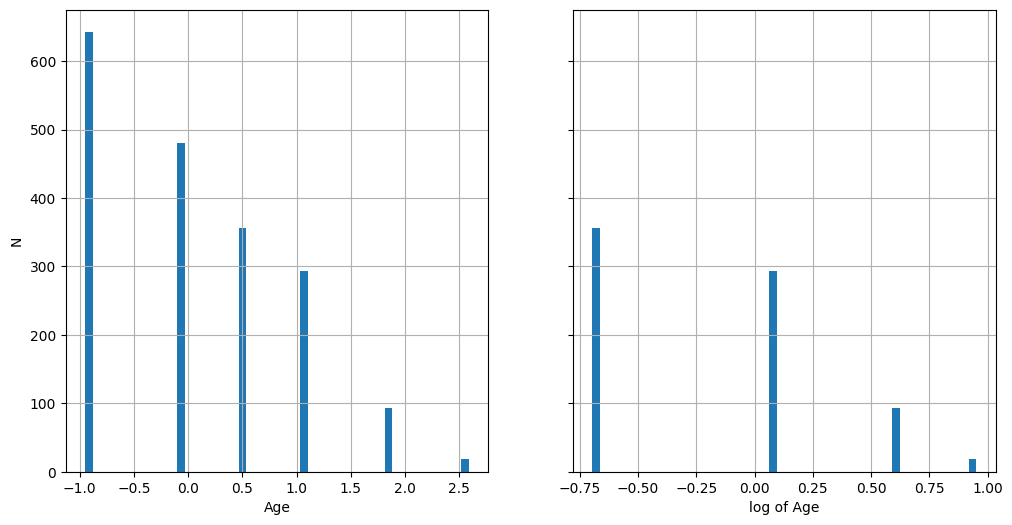

In [103]:
fig, axs = plt.subplots(1,2, figsize=(12,6),sharey = True )
dt_encoder_drug['Age'].hist(ax=axs[0], bins=50)
dt_encoder_drug['Age'].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel('Age')
axs[1].set_xlabel('log of Age')
axs[0].set_ylabel('N')
plt.show()

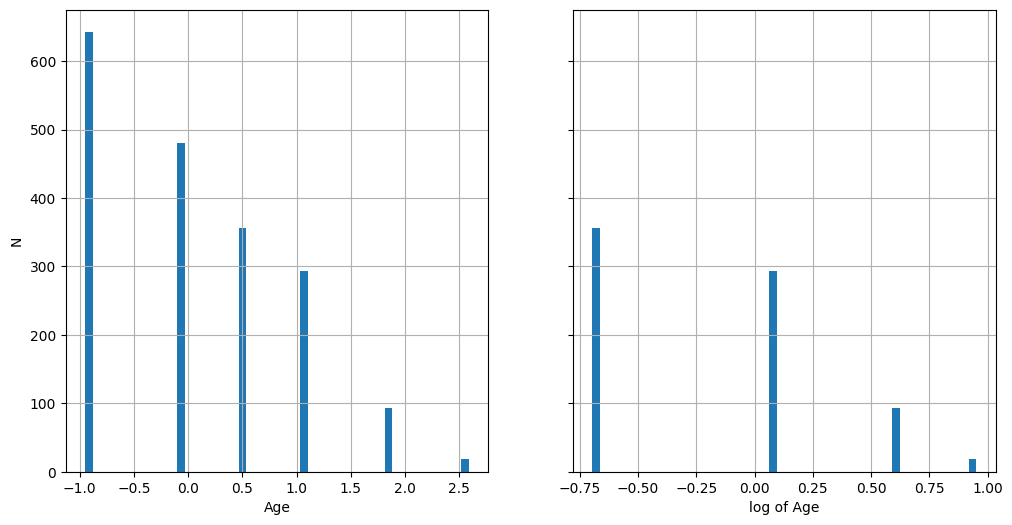

In [104]:
fig, axs = plt.subplots(1,2, figsize=(12,6),sharey = True )
dt_encoder_drug['Age'].hist(ax=axs[0], bins=50)
dt_encoder_drug['Age'].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel('Age')
axs[1].set_xlabel('log of Age')
axs[0].set_ylabel('N')
plt.show()

Gracias a la naturaleza de los datos, las caracteristicas tienen una distribucion normal por lo que no es necesario realizar escalado de datos.

# RBF

In [105]:
from sklearn.metrics.pairwise import rbf_kernel

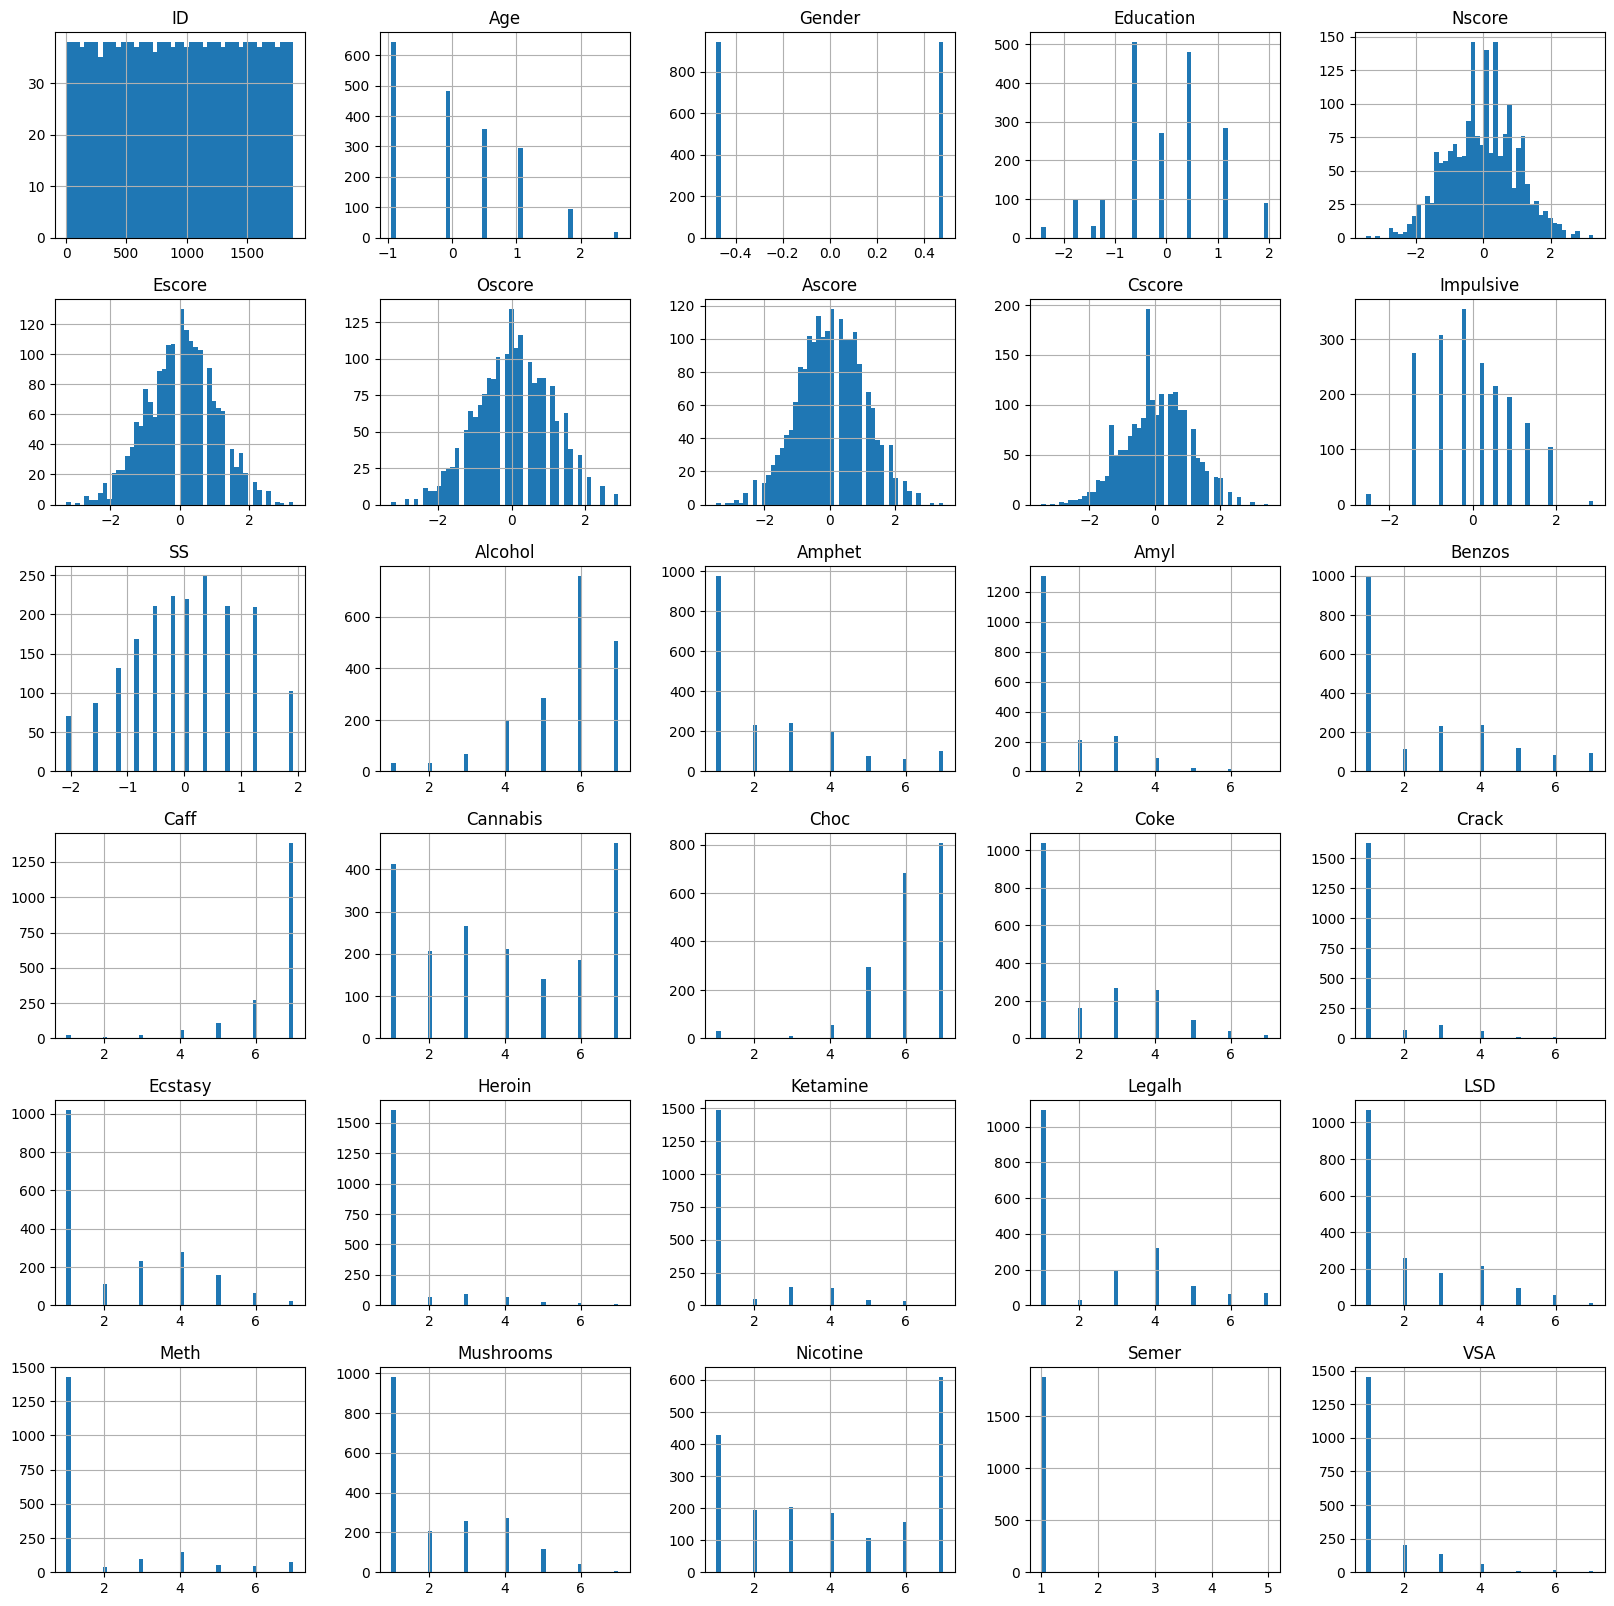

In [106]:

# Ahora, vamos a crear el histograma del DataFrame drug_df
dt_encoder_drug.hist(bins=50, figsize=(20, 20))


plt.show()

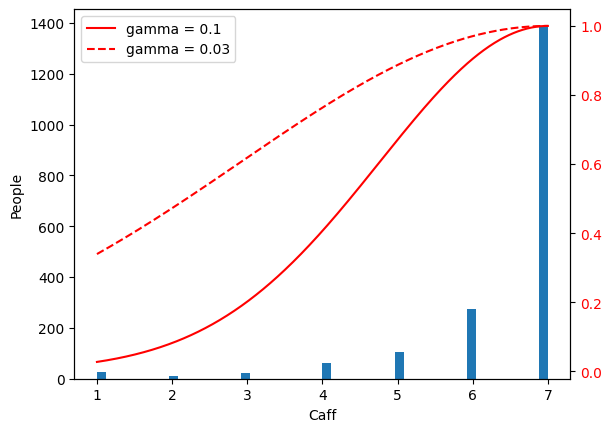

In [107]:
score = np.linspace(dt_encoder_drug['Caff'].min(),
                   dt_encoder_drug['Caff'].max(),500).reshape(-1,1)

gamma1 = 0.1
gamma2 = 0.03

rbf1 = rbf_kernel(score,[[7]], gamma = gamma1)
rbf2 = rbf_kernel(score,[[7]], gamma = gamma2)

fig, axs1 = plt.subplots()

axs1.set_xlabel('Caff')
axs1.set_ylabel('People')
axs1.hist(dt_encoder_drug['Caff'], bins=50)


axs2 = axs1.twinx()
color='red'

axs2.plot(score,rbf1, color = color, label ='gamma = 0.1')
axs2.plot(score,rbf2, color = color, label ='gamma = 0.03', linestyle ='--')
axs2.tick_params(axis='y', labelcolor = color)


plt.legend(loc='upper left')
plt.show()

- El RBF, o función de base radial, se utiliza para examinar la similitud entre las diferentes categorías de uso de la droga 'Caff' en relación con un valor específico, que en este caso es 7, mediante el uso del kernel RBF.
- El parámetro gamma en el kernel RBF desempeña un papel crucial, ya que regula la influencia de cada muestra individual sobre el resultado. Valores más bajos de gamma resultan en una influencia más amplia, extendiéndose sobre un rango mayor, mientras que valores más altos concentran la influencia de forma más localizada. Así, las curvas generadas con diferentes valores de gamma ilustran cómo la similitud disminuye más rápidamente con el aumento de la distancia a la categoría de interés.
- Ajustar el valor de gamma es especialmente crítico, dado que un valor más bajo de gamma implica una mayor distancia entre las categorías de interés, lo cual afecta significativamente la probabilidad asignada a cada categoría. Esta configuración es esencial para modelar adecuadamente la interacción entre las categorías y obtener predicciones precisas en función de la similitud calculada.

# Division de los datos

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
np.random.seed(42)

In [110]:
train_drug, test_drug = train_test_split(dt_encoder_drug, test_size=0.2, random_state=42)

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [123]:
# Seleccionar características
features = ['Age', 'Gender', 'Education', 'Nscore',
            'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

label = 'Benzos' #Utilizaremos de ejemplo la variable Nicotine para hacer la predicción

# Se dividen las caracteristicas y etiquetas
X_train = train_drug[features]
y_train = train_drug[label]
X_test = test_drug[features]
y_test = test_drug[label]

In [124]:
# Iniciar el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

#Hacer predicciones
pred = model.predict(X_test)
print("Predicciones:\n ", pred[1:20])
print("Valores reales:\n ", y_test[1:20])

Predicciones:
  [1.82126472 2.59825482 1.67347574 3.95548271 2.17088194 1.65574597
 1.96746397 4.29235636 1.71880257 1.49483667 2.62825425 3.25944716
 2.40961452 1.64559391 3.08822968 2.93359503 3.38793577 1.85354369
 1.46404847]
Valores reales:
  382     1
462     4
1741    1
917     4
1053    4
270     1
596     3
1075    3
411     1
188     3
1234    5
331     1
535     1
1314    1
1214    1
1157    4
845     7
1271    1
1448    1
Name: Benzos, dtype: int64


In [125]:
# Calcular la funcion de error
mse = mean_squared_error(y_test,pred)
print(mse)

3.1710411777141667
